HEART FAILURE DISEASE 

data collection

In [139]:
import pandas as pd 
df = pd.read_csv("heart.csv")
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [140]:
d = df.isnull().sum()
d

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

data preprocessing 

In [141]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [142]:
df["Sex"] = label.fit_transform(df["Sex"])
df["ChestPainType"] = label.fit_transform(df["ChestPainType"])
df["RestingECG"] = label.fit_transform(df["RestingECG"])
df["ExerciseAngina"] = label.fit_transform(df["ExerciseAngina"])
df["ST_Slope"] = label.fit_transform(df["ST_Slope"])
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


feature selection

In [143]:
x = df[["Age","Sex","ChestPainType","RestingBP","Cholesterol","FastingBS","RestingECG","MaxHR","ExerciseAngina","Oldpeak","ST_Slope"]]
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


In [144]:
y = df["HeartDisease"]
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [145]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaler = scaler.fit_transform(x)
x_scaler

array([[0.24489796, 1.        , 0.33333333, ..., 0.        , 0.29545455,
        1.        ],
       [0.42857143, 0.        , 0.66666667, ..., 0.        , 0.40909091,
        0.5       ],
       [0.18367347, 1.        , 0.33333333, ..., 0.        , 0.29545455,
        1.        ],
       ...,
       [0.59183673, 1.        , 0.        , ..., 1.        , 0.43181818,
        0.5       ],
       [0.59183673, 0.        , 0.33333333, ..., 0.        , 0.29545455,
        0.5       ],
       [0.20408163, 1.        , 0.66666667, ..., 0.        , 0.29545455,
        1.        ]])

data splitting 

In [146]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size=0.2)

In [147]:
from sklearn.model_selection import cross_val_score

LOGISTIC REGRESSION 

model selection & model training

In [148]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(x_train,y_train)

LogisticRegression()

evaluate model

In [149]:
logistic.score(x_test,y_test)

0.8152173913043478

In [150]:
score = cross_val_score(LogisticRegression(),x_scaler,y,cv =5)
score

array([0.82065217, 0.83152174, 0.8423913 , 0.82513661, 0.75409836])

In [151]:
y_pre = logistic.predict(x_test)
from sklearn.metrics import classification_report
report = classification_report(y_pre,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.80      0.82        96
           1       0.79      0.83      0.81        88

    accuracy                           0.82       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.82      0.82      0.82       184



In [152]:
y_pre = logistic.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pre,y_test)
cm

array([[77, 19],
       [15, 73]], dtype=int64)

<Axes: >

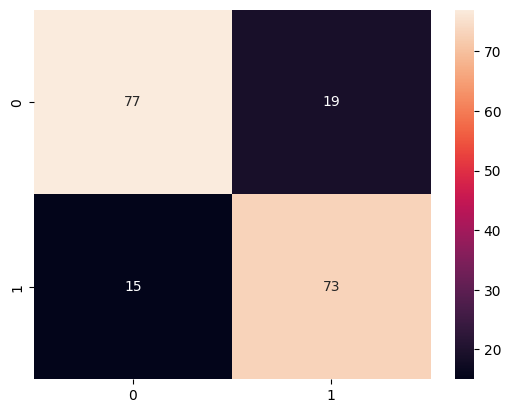

In [153]:
import seaborn as sns 
sns.heatmap(cm, annot=True)

DECISION TREE

model selection & model training

In [154]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

evaluate model

In [155]:
tree.score(x_test,y_test)

0.8097826086956522

In [156]:
score = cross_val_score(DecisionTreeClassifier(),x_scaler,y,cv =5)
score

array([0.76086957, 0.77173913, 0.78804348, 0.75409836, 0.66666667])

In [157]:
y_pre = tree.predict(x_test)
from sklearn.metrics import classification_report
report = classification_report(y_pre,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.81      0.81        93
           1       0.80      0.81      0.81        91

    accuracy                           0.81       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.81      0.81      0.81       184



In [158]:
y_pre = tree.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pre,y_test)
cm

array([[75, 18],
       [17, 74]], dtype=int64)

<Axes: >

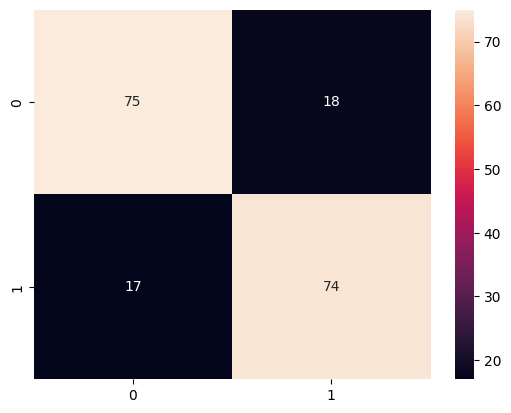

In [159]:
import seaborn as sns 
sns.heatmap(cm, annot=True)

RANDOM FORSETS 

model selection & model training

In [160]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

evaluate model

In [161]:
rf.score(x_test,y_test)

0.8206521739130435

In [162]:
score = cross_val_score(RandomForestClassifier(),x_scaler,y,cv =5)
score

array([0.88586957, 0.83152174, 0.83695652, 0.84153005, 0.75409836])

In [163]:
y_pre = rf.predict(x_test)
from sklearn.metrics import classification_report
report = classification_report(y_pre,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.82      0.82        93
           1       0.82      0.82      0.82        91

    accuracy                           0.82       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.82      0.82      0.82       184



In [164]:
y_pre = rf.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pre,y_test)
cm

array([[76, 17],
       [16, 75]], dtype=int64)

<Axes: >

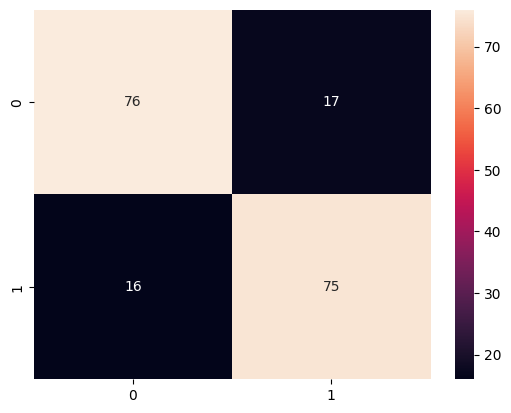

In [165]:
import seaborn as sns 
sns.heatmap(cm, annot=True)

KNN

model selection & model training

In [166]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=20)

evaluate model

In [167]:
knn.score(x_test,y_test)

0.8369565217391305

In [168]:
score = cross_val_score(KNeighborsClassifier(),x_scaler,y,cv =5)
score

array([0.86413043, 0.8423913 , 0.84782609, 0.80874317, 0.75409836])

In [169]:
y_pre = knn.predict(x_test)
from sklearn.metrics import classification_report
report = classification_report(y_pre,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.84      0.84        90
           1       0.85      0.83      0.84        94

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



In [170]:
y_pre = knn.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pre,y_test)
cm

array([[76, 14],
       [16, 78]], dtype=int64)

<Axes: >

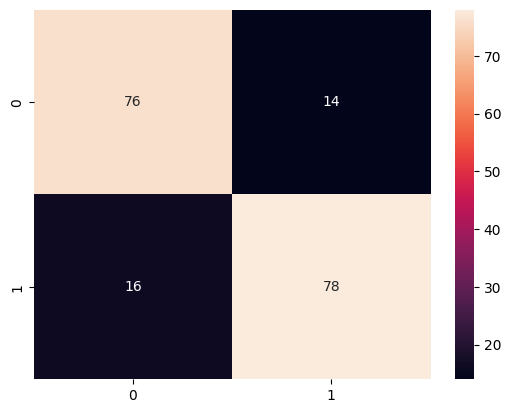

In [171]:
import seaborn as sns 
sns.heatmap(cm, annot=True)

SVC

model selection & model training

In [172]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train,y_train)

SVC()

evaluate model

In [173]:
svm.score(x_test,y_test)

0.875

In [174]:
score = cross_val_score(SVC(),x_scaler,y,cv =5)
score

array([0.89673913, 0.8423913 , 0.85326087, 0.81420765, 0.7704918 ])

In [175]:
y_pre = svm.predict(x_test)
from sklearn.metrics import classification_report
report = classification_report(y_pre,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87        87
           1       0.90      0.86      0.88        97

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



In [176]:
y_pre = svm.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pre,y_test)
cm

array([[78,  9],
       [14, 83]], dtype=int64)

<Axes: >

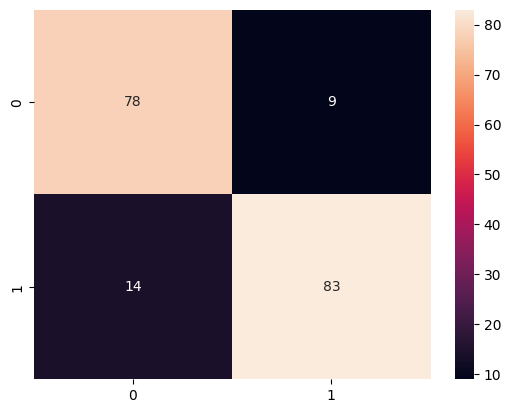

In [177]:
import seaborn as sns 
sns.heatmap(cm, annot=True)